 # Loan approval prediction
The goal of this project is to build a machine learning model to predict whethere one's loan application will be rejected or approved based on features like loan amount, credit score, income 

In [1]:
#import main libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#directory of file in read mode
file_directory = r"C:\Users\Admin\OneDrive\Desktop\ml projects\loan_approval_dataset.csv"

#reading the file 
with open(file_directory,"r") as loan_data:
    loan_data = pd.read_csv(file_directory)
    print(loan_data)
    

      loan_id   no_of_dependents      education  self_employed   income_annum  \
0           1                  2       Graduate             No        9600000   
1           2                  0   Not Graduate            Yes        4100000   
2           3                  3       Graduate             No        9100000   
3           4                  3       Graduate             No        8200000   
4           5                  5   Not Graduate            Yes        9800000   
...       ...                ...            ...            ...            ...   
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes        3300000   
4266     4267                  2   Not Graduate             No        6500000   
4267     4268                  1   Not Graduate             No        4100000   
4268     4269                  1       Graduate             No        9200000   

       loan_amount   loan_t

In [4]:
#total size of data in loan_data
loan_data.size

55497

In [5]:
#now let divide the dataset to see the all data types of particular column
def int_datatype(loan_data):
    int_datatype = loan_data.select_dtypes(include="int64").columns.tolist()
    for int_columns in int_datatype:
        print(int_columns)
result = int_datatype(loan_data)   
result

loan_id
 no_of_dependents
 income_annum
 loan_amount
 loan_term
 cibil_score
 residential_assets_value
 commercial_assets_value
 luxury_assets_value
 bank_asset_value


In [6]:
def object_datatype(loan_data):
    object_datatype = loan_data.select_dtypes(include="object").columns.tolist()
    for object_columns in object_datatype:
        print(object_columns)
result = object_datatype(loan_data)   
result

 education
 self_employed
 loan_status


In [7]:
#now let see the the statistical value of particular dataset
loan_data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [8]:
loan_data[" bank_asset_value"].unique()

array([ 8000000,  3300000, 12800000,  7900000,  5000000,  5100000,
        4300000,  6000000,   600000,  1600000,  3100000,  6400000,
        1900000,  4400000,   700000,  5900000,  6100000,  5400000,
        8500000,   300000,  2600000,  7200000,  2500000,  9700000,
        9300000,  1000000,  5800000,   900000,  1400000,  7100000,
        2900000,  9000000,  5200000,   800000, 10900000,  4900000,
        6500000,  8200000, 11700000, 10500000, 11300000,  3400000,
        6200000,  8700000,  4100000,  4800000, 11400000,  4700000,
        2800000, 11900000,  5500000,  2400000,  4200000,  7600000,
        5600000,  2000000,  1100000,  6300000, 11100000,  8600000,
        6800000,  3600000, 10200000, 12700000,  2100000,  1300000,
         400000,  7000000,  7300000,   100000,   200000, 11600000,
        1800000,  9800000,  8100000,  7500000, 13400000,  9600000,
        3800000,  8400000,  3200000,  1200000,  4600000,  8300000,
        4500000,  3500000,  2300000,  7400000,  1700000,  9500

In [9]:
loan_data.fillna(loan_data[" bank_asset_value"].mean(),inplace=True)
loan_data.fillna(loan_data[" residential_assets_value"].mean(),inplace=True)
loan_data.fillna(loan_data[" commercial_assets_value"].mean(),inplace=True)

In [10]:
#now let see the null values in all columns
loan_data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [11]:
#now let see any duplicate or repeating values in all columns
loan_data.duplicated().sum()

0

In [12]:
#now let create dummy of loan_data for deleting or removing any columns
loan_data_1 = pd.get_dummies(loan_data)

In [13]:
#now droping the column loan_id  since it is not required for feature selection
loan_data_1.drop("loan_id",axis=1,inplace=True)

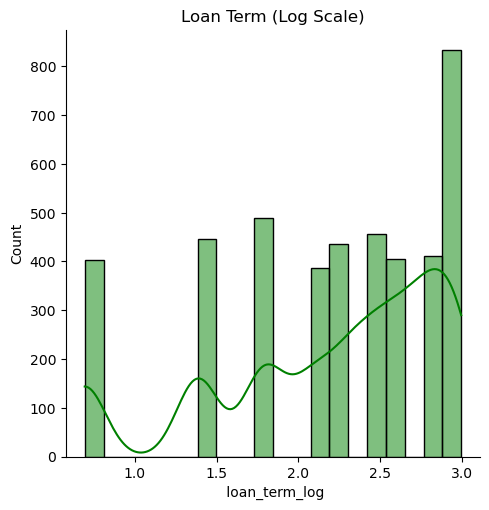

In [14]:

loan_data[" loan_term_log"] = np.log(loan_data[" loan_term"])
sns.displot(loan_data[" loan_term_log"], color="green", kde=True)
plt.title("Loan Term (Log Scale)")
plt.show()

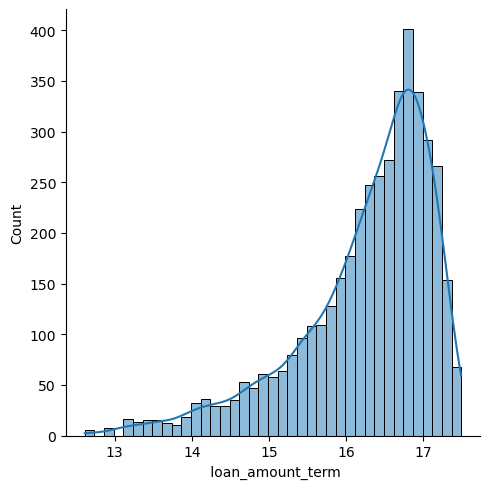

In [72]:
loan_data[" loan_amount_term"] = np.log(loan_data[" loan_amount"])
sns.displot(loan_data[" loan_amount_term"],kde=True)

Text(0.5, 1.0, 'cibil_score(log)')

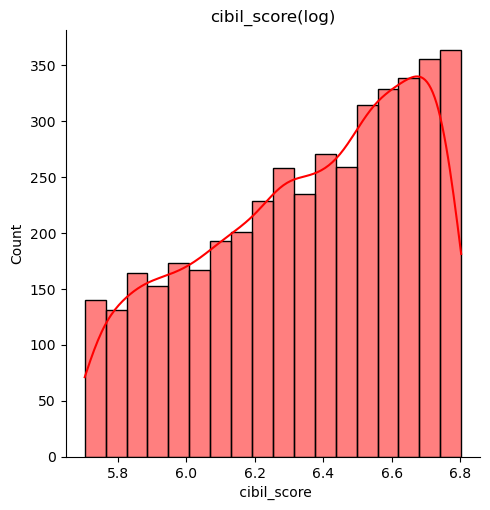

In [16]:
loan_data[" cibil_score"] = np.log(loan_data[" cibil_score"])
sns.displot(loan_data[" cibil_score"],kde=True,color="red")
plt.title("cibil_score(log)")

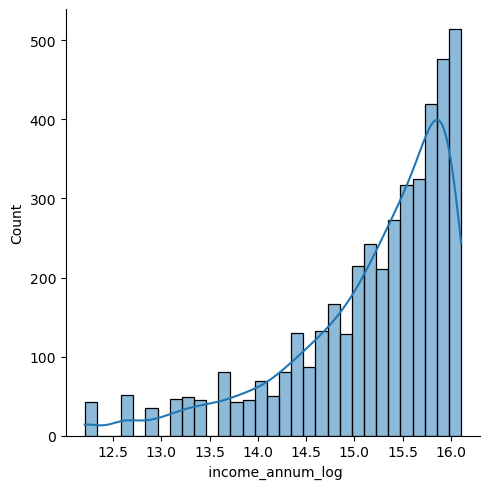

In [15]:
loan_data[" income_annum_log"] = np.log(loan_data[" income_annum"])
sns.displot(loan_data[" income_annum_log"],kde=True)

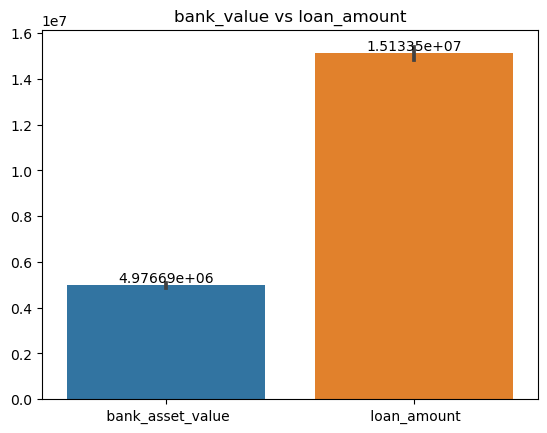

In [17]:
#let see the differnce of bank_asset value and loan_amount
ax = sns.barplot(loan_data[[" bank_asset_value"," loan_amount"]])
plt.title("bank_value vs loan_amount")
for bars in ax.containers:
    ax.bar_label(bars)

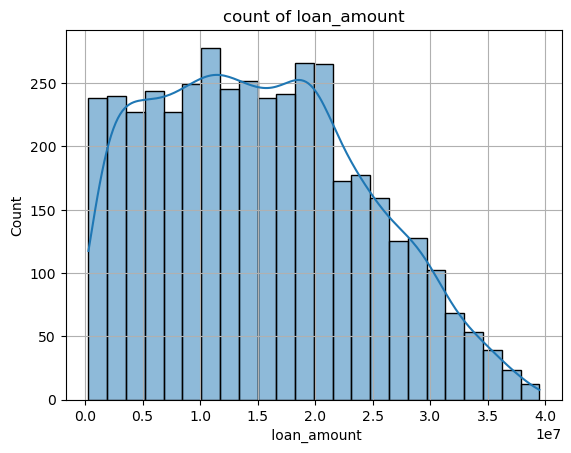

In [18]:
sns.histplot(loan_data_1[" loan_amount"],kde=True,edgecolor="black")
plt.title("count of loan_amount")
plt.grid()

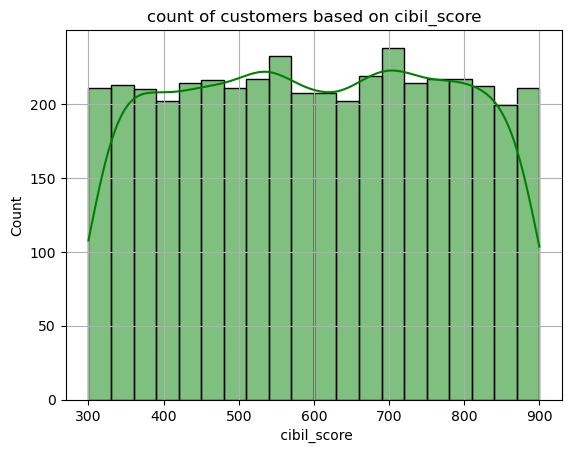

In [16]:
#now ploting the histplot of cibil_score based on income_annum

sns.histplot(loan_data[" cibil_score"],kde=True,color="green",bins=20,edgecolor="black")
plt.title("count of customers based on cibil_score")
plt.grid()

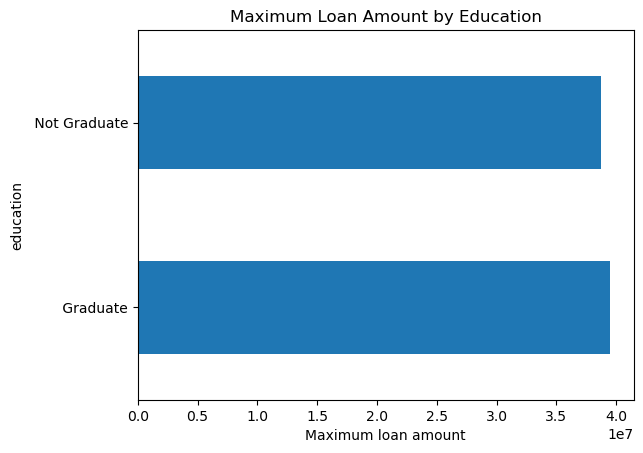

In [17]:
#now pltting the loan_amount based on education

plot = loan_data.groupby(" education")[" loan_amount"].max()
plot.plot(kind="barh")
plt.title("Maximum Loan Amount by Education")
plt.xlabel("Maximum loan amount")
plt.ylabel("education")
plt.show()

Text(0.5, 1.0, 'loan_status based on cibil score')

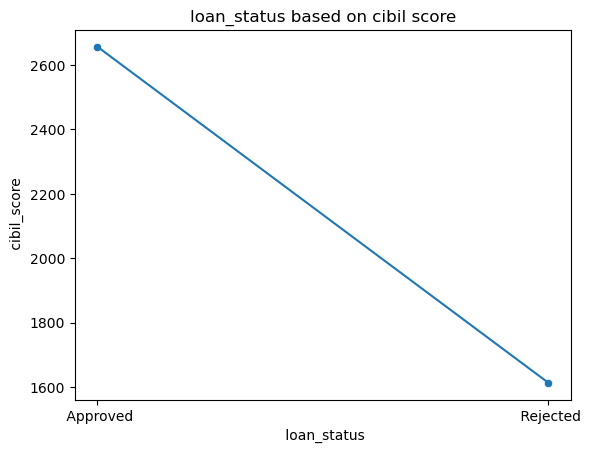

In [18]:
a = loan_data.groupby(" loan_status")[" cibil_score"].count()
sns.scatterplot(a)
sns.lineplot(a)
plt.title("loan_status based on cibil score")

Text(0, 0.5, 'loan customers')

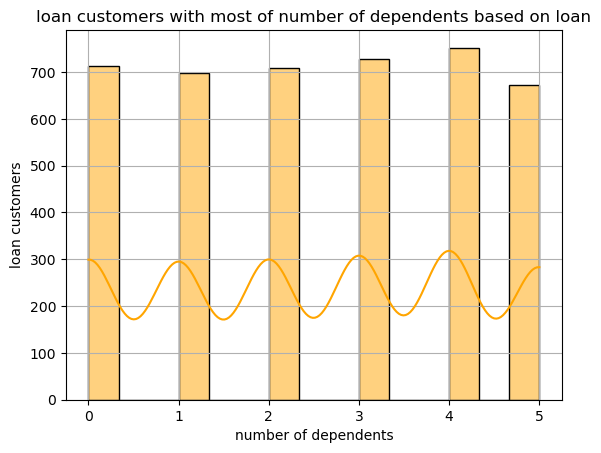

In [19]:
sns.histplot(loan_data[" no_of_dependents"], color="orange", bins=15,kde=True,edgecolor="black")
plt.title("loan customers with most of number of dependents based on loan")
plt.grid()
plt.xlabel("number of dependents")
plt.ylabel("loan customers")

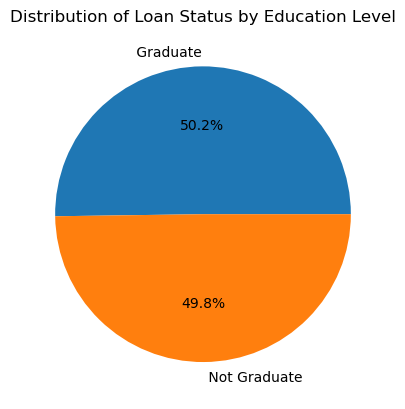

In [20]:
# Assuming loan_data is your DataFrame
a = loan_data.groupby(" education")[" loan_status"].count()

# Plotting the pie chart
plt.pie(a, labels=a.index, autopct='%1.1f%%')
plt.title('Distribution of Loan Status by Education Level')
plt.show()

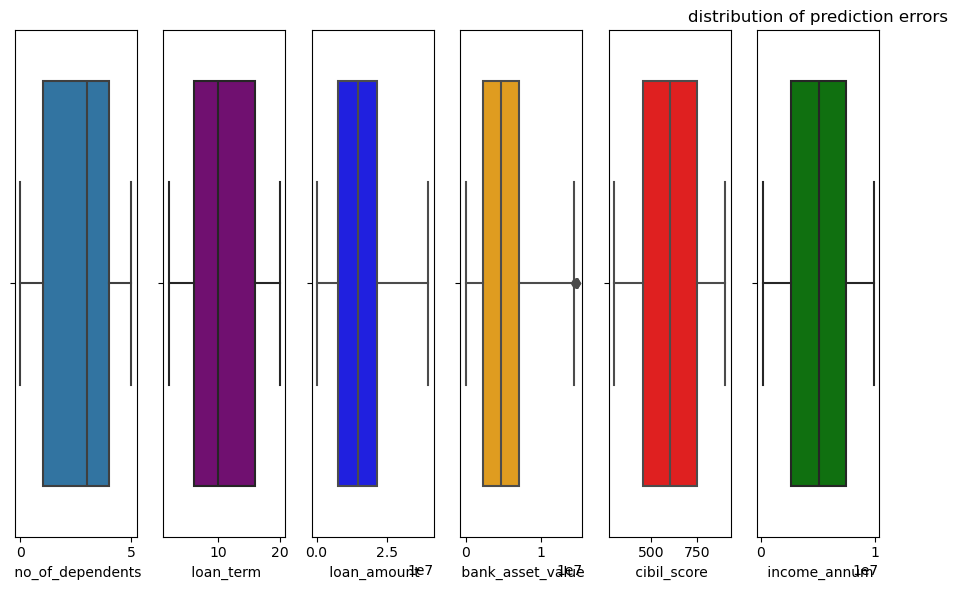

In [14]:
# Create a figure and axis for subplots
fig, axes = plt.subplots(1, 6, figsize=(9, 6))

# Boxplot for number of dependents
sns.boxplot(ax=axes[0], x=loan_data[" no_of_dependents"])


# Boxplot for loan term
sns.boxplot(ax=axes[1], x=loan_data[" loan_term"],color="purple")

sns.boxplot(ax=axes[2], x=loan_data[" loan_amount"],color="blue")

sns.boxplot(ax=axes[3], x=loan_data[" bank_asset_value"],color="orange")

sns.boxplot(ax=axes[4],x=loan_data[" cibil_score"],color="red")

sns.boxplot(ax=axes[5] , x=loan_data[" income_annum"],color="green")

plt.title("distribution of prediction errors")
plt.tight_layout()
# Display the plot
plt.show()

In [15]:
#calcualting the q1 and q2 for IQR method
q1 = loan_data[[" loan_term"," no_of_dependents"," loan_amount"," cibil_score"," income_annum"," bank_asset_value"," residential_assets_value"," commercial_assets_value"," loan_term"]].quantile(0.25)
print(q1)

 loan_term                         6.0
 no_of_dependents                  1.0
 loan_amount                 7700000.0
 cibil_score                     453.0
 income_annum                2700000.0
 bank_asset_value            2300000.0
 residential_assets_value    2200000.0
 commercial_assets_value     1300000.0
 loan_term                         6.0
Name: 0.25, dtype: float64


In [16]:
q2 = loan_data[[" loan_term"," no_of_dependents"," loan_amount"," cibil_score"," income_annum"," bank_asset_value"," residential_assets_value"," commercial_assets_value"," loan_term"]].quantile(0.75)
print(q2)                                                                                                                                                                                       

 loan_term                         16.0
 no_of_dependents                   4.0
 loan_amount                 21500000.0
 cibil_score                      748.0
 income_annum                 7500000.0
 bank_asset_value             7100000.0
 residential_assets_value    11300000.0
 commercial_assets_value      7600000.0
 loan_term                         16.0
Name: 0.75, dtype: float64


In [17]:
#now finding the IQR using 
IQR = q2-q1
print(IQR)

 loan_term                         10.0
 no_of_dependents                   3.0
 loan_amount                 13800000.0
 cibil_score                      295.0
 income_annum                 4800000.0
 bank_asset_value             4800000.0
 residential_assets_value     9100000.0
 commercial_assets_value      6300000.0
 loan_term                         10.0
dtype: float64


In [18]:
#now calculating the upper_limit and lower limit with help of IQR
upper_limit = q1-1.5*IQR
lower_limit = q2+1.5*IQR
print(upper_limit)

 loan_term                         -9.0
 no_of_dependents                  -3.5
 loan_amount                -13000000.0
 cibil_score                       10.5
 income_annum                -4500000.0
 bank_asset_value            -4900000.0
 residential_assets_value   -11450000.0
 commercial_assets_value     -8150000.0
 loan_term                         -9.0
dtype: float64


In [19]:
print(lower_limit)

 loan_term                         31.0
 no_of_dependents                   8.5
 loan_amount                 42200000.0
 cibil_score                     1190.5
 income_annum                14700000.0
 bank_asset_value            14300000.0
 residential_assets_value    24950000.0
 commercial_assets_value     17050000.0
 loan_term                         31.0
dtype: float64


In [20]:
lower_limit = 31.0
upper_limit =-9.0
removing_outliers = loan_data.loc[(loan_data[' loan_term'] >lower_limit) & (loan_data[' loan_term'] < upper_limit)]

#outliers for loan_term
lower_limit = 31.0
upper_limit =-9.0
loan_term_removing_outliers = loan_data.loc[(loan_data[' loan_term'] >lower_limit) & (loan_data[' loan_term'] < upper_limit)]

#outlietrs for loan_amount
lower_limit = 42200000.00
upper_limit =-1300000.00
loan_amount_removing_outliers = loan_data.loc[(loan_data[' loan_term'] >lower_limit) & (loan_data[' loan_term'] < upper_limit)]

#outliers for cibil_score
lower_limit = 1190.5
upper_limit = 10.5
cibil_score_removing_outliers = loan_data.loc[(loan_data[' loan_term'] >lower_limit) & (loan_data[' loan_term'] < upper_limit)]

#outliers for no_of dependents
lower_limit = 8.5
upper_limit = -3.5
no_of_dependents_removing_outliers = loan_data.loc[(loan_data[' loan_term'] >lower_limit) & (loan_data[' loan_term'] < upper_limit)]

#outliers for bank_asset_value
lower_limit =  14300000.0
upper_limit =  -4900000.0
bank_asset_removing_outliers = loan_data.loc[(loan_data[' loan_term'] >lower_limit) & (loan_data[' loan_term'] < upper_limit)]

In [21]:
# now convert my categorical column into numerical column
from sklearn.preprocessing import LabelEncoder
Transformation = LabelEncoder()
loan_data[" education"]=Transformation.fit_transform(loan_data[[" education"]])
loan_data[" self_employed"]=Transformation.fit_transform(loan_data[[" self_employed"]])


#let see whether the particular fetures is transformed or not
loan_data[[" education", " self_employed"]]

,education,self_employed
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
4264,0,1
4265,1,1
4266,1,0
4267,1,0


In [22]:
#splitting my feature selection into feature and targest feature
X = loan_data.drop([' loan_status'], axis=1)  # features
y = loan_data[' loan_status']  # target variable

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
loan_data[" loan_status"] = le.fit_transform(loan_data[[" loan_status"]])

In [24]:
from sklearn.model_selection import train_test_split

#splitting the feature and target feature for training and testing purpose
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

#now let see the size of train and test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3415, 13)
(854, 13)
(3415,)
(854,)


In [25]:
#import library 
from sklearn.model_selection import GridSearchCV

#best parameter ranges
param_grid={'criterion':['gini','entropy'],
            'min_samples_split':[2,5,10,15],
            'min_samples_leaf':[1,5,10],
            'splitter':['best','random']}

#now import the decision tree 
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42,max_depth=3)

#now using of parametere we will train the model
grid_search= GridSearchCV(tree,param_grid,cv=5,n_jobs=-1,verbose=0,scoring='accuracy')
print(grid_search)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10, 15],
                         'splitter': ['best', 'random']},
             scoring='accuracy')


In [26]:
best_dt_model = grid_search.fit(X_train,y_train)

In [27]:
print("best hyperamaters for decision tree : ",grid_search.best_params_)
print("best estimator for decision tree : ",grid_search.best_estimator_)
print("best scoring based on accuracy : ",grid_search.best_score_*100)

best hyperamaters for decision tree :  {'criterion': 'gini', 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'best'}
best estimator for decision tree :  DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)
best scoring based on accuracy :  96.19326500732065


In [32]:
print(grid_search.best_estimator_.tree_)

In [33]:
y_predict_dt = best_dt_model.predict(X_test)
print(y_predict_dt)

[' Approved' ' Approved' ' Approved' ' Rejected' ' Rejected' ' Rejected'
 ' Approved' ' Approved' ' Approved' ' Rejected' ' Approved' ' Approved'
 ' Rejected' ' Rejected' ' Rejected' ' Approved' ' Approved' ' Approved'
 ' Rejected' ' Approved' ' Approved' ' Approved' ' Rejected' ' Approved'
 ' Approved' ' Rejected' ' Rejected' ' Approved' ' Approved' ' Approved'
 ' Rejected' ' Approved' ' Rejected' ' Rejected' ' Approved' ' Rejected'
 ' Approved' ' Approved' ' Approved' ' Approved' ' Approved' ' Rejected'
 ' Approved' ' Approved' ' Rejected' ' Approved' ' Approved' ' Rejected'
 ' Rejected' ' Approved' ' Approved' ' Approved' ' Approved' ' Approved'
 ' Rejected' ' Approved' ' Rejected' ' Approved' ' Rejected' ' Rejected'
 ' Approved' ' Approved' ' Rejected' ' Approved' ' Rejected' ' Rejected'
 ' Rejected' ' Approved' ' Rejected' ' Rejected' ' Approved' ' Approved'
 ' Approved' ' Rejected' ' Approved' ' Rejected' ' Approved' ' Approved'
 ' Rejected' ' Rejected' ' Rejected' ' Approved' ' 

In [34]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000)

params_grid = {"C":[0.0001,0.001,0.01,0.1,1,10,100],
               "penalty":["l1","l2"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(logistic_model,params_grid,cv=5,n_jobs=-1,verbose=0,scoring="accuracy")
print(grid_search)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')


In [35]:
best_logistic_model = grid_search.fit(X_train,y_train)

In [36]:
print("best hyperamaters for logistic regression : ",grid_search.best_params_)
print("best estimator for logistic regression : ",grid_search.best_estimator_)
print("best scoring based on accuracy : ",grid_search.best_score_*100)

best hyperamaters for logistic regression :  {'C': 0.001, 'penalty': 'l2'}
best estimator for logistic regression :  LogisticRegression(C=0.001, max_iter=1000)
best scoring based on accuracy :  67.49633967789165


In [37]:
y_predict_logistic = best_logistic_model.predict(X_test)
print(y_predict_logistic)

[' Approved' ' Approved' ' Rejected' ' Approved' ' Rejected' ' Approved'
 ' Approved' ' Approved' ' Rejected' ' Rejected' ' Approved' ' Approved'
 ' Rejected' ' Rejected' ' Rejected' ' Rejected' ' Approved' ' Approved'
 ' Approved' ' Approved' ' Approved' ' Approved' ' Rejected' ' Approved'
 ' Approved' ' Approved' ' Rejected' ' Approved' ' Approved' ' Approved'
 ' Rejected' ' Approved' ' Approved' ' Approved' ' Approved' ' Approved'
 ' Approved' ' Approved' ' Approved' ' Approved' ' Approved' ' Rejected'
 ' Rejected' ' Approved' ' Rejected' ' Approved' ' Approved' ' Approved'
 ' Approved' ' Approved' ' Approved' ' Approved' ' Approved' ' Approved'
 ' Approved' ' Approved' ' Approved' ' Approved' ' Rejected' ' Approved'
 ' Approved' ' Approved' ' Rejected' ' Approved' ' Approved' ' Approved'
 ' Rejected' ' Rejected' ' Approved' ' Approved' ' Approved' ' Approved'
 ' Approved' ' Approved' ' Approved' ' Rejected' ' Approved' ' Approved'
 ' Rejected' ' Approved' ' Approved' ' Approved' ' 

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=45,max_depth=3)

params_grid = {"n_estimators":[100,200,300],
               "max_features":["auto","sqrt","log2"],
               "min_samples_split":["none",2,5,10],
               "max_leaf_nodes":["none",1,5,10],
              "bootstrap":[True,False]}                     

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(rf_model,params_grid,cv=5,scoring="accuracy",n_jobs=-1)

In [39]:
best_rf_model=grid_search.fit(X_train,y_train)

In [40]:
print("best hyperparameters",grid_search.best_params_)
print("best estimator for random forest tree : ",grid_search.best_estimator_)
print("best scoring based on accuracy : ",grid_search.best_score_*100)

best hyperparameters {'bootstrap': True, 'max_features': 'auto', 'max_leaf_nodes': 10, 'min_samples_split': 2, 'n_estimators': 100}
best estimator for random forest tree :  RandomForestClassifier(max_depth=3, max_features='auto', max_leaf_nodes=10,
                       random_state=45)
best scoring based on accuracy :  95.90043923865301


In [41]:
y_predict_rf=best_rf_model.predict(X_test)
print(y_predict_rf)

[' Approved' ' Approved' ' Approved' ' Rejected' ' Approved' ' Rejected'
 ' Approved' ' Approved' ' Approved' ' Rejected' ' Approved' ' Approved'
 ' Rejected' ' Rejected' ' Rejected' ' Approved' ' Approved' ' Approved'
 ' Approved' ' Approved' ' Approved' ' Approved' ' Rejected' ' Approved'
 ' Approved' ' Rejected' ' Rejected' ' Approved' ' Approved' ' Approved'
 ' Rejected' ' Approved' ' Approved' ' Rejected' ' Approved' ' Rejected'
 ' Approved' ' Approved' ' Approved' ' Approved' ' Approved' ' Rejected'
 ' Approved' ' Approved' ' Rejected' ' Approved' ' Approved' ' Rejected'
 ' Rejected' ' Approved' ' Approved' ' Approved' ' Approved' ' Approved'
 ' Rejected' ' Approved' ' Approved' ' Approved' ' Approved' ' Rejected'
 ' Approved' ' Approved' ' Rejected' ' Approved' ' Rejected' ' Approved'
 ' Rejected' ' Approved' ' Approved' ' Approved' ' Approved' ' Approved'
 ' Approved' ' Rejected' ' Approved' ' Rejected' ' Approved' ' Approved'
 ' Rejected' ' Approved' ' Rejected' ' Approved' ' 

In [124]:
#now my target accuracy for best model is 96.6% based on accuracy of testing_data and prediction data
from sklearn.metrics import accuracy_score

def get_accuracy(y_test, y_predict_dt, y_predict_logistic, y_predict_rf):
    dt_accuracy = accuracy_score(y_test, y_predict_dt)
    logistic_accuracy = accuracy_score(y_test, y_predict_logistic)
    rf_accuracy = accuracy_score(y_test, y_predict_rf)

    print(f"Decision Tree accuracy: {dt_accuracy}")
    print(f"Logistic Regression accuracy: {logistic_accuracy}")
    print(f"Random Forest accuracy: {rf_accuracy}")

    return dt_accuracy, logistic_accuracy, rf_accuracy

dt_accuracy, logistic_accuracy, rf_accuracy = get_accuracy(y_test, y_predict_dt, y_predict_logistic, y_predict_rf)

Decision Tree accuracy: 0.9637002341920374
Logistic Regression accuracy: 0.7587822014051522
Random Forest accuracy: 0.9695550351288056


In [154]:
best_rf_tree = best_rf_model.estimators_
best_rf_tree

[DecisionTreeClassifier(max_depth=3, max_features='sqrt', max_leaf_nodes=10,
                        min_samples_split=10, random_state=2100288459),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', max_leaf_nodes=10,
                        min_samples_split=10, random_state=1307974046),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', max_leaf_nodes=10,
                        min_samples_split=10, random_state=212792963),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', max_leaf_nodes=10,
                        min_samples_split=10, random_state=736499580),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', max_leaf_nodes=10,
                        min_samples_split=10, random_state=1208806944),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', max_leaf_nodes=10,
                        min_samples_split=10, random_state=1804481119),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', max_leaf_nodes=10,
                        min_sam

In [43]:

best_rf_tree = grid_search.best_estimator_
print(type(best_rf_tree))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [45]:
from sklearn.tree import plot_tree

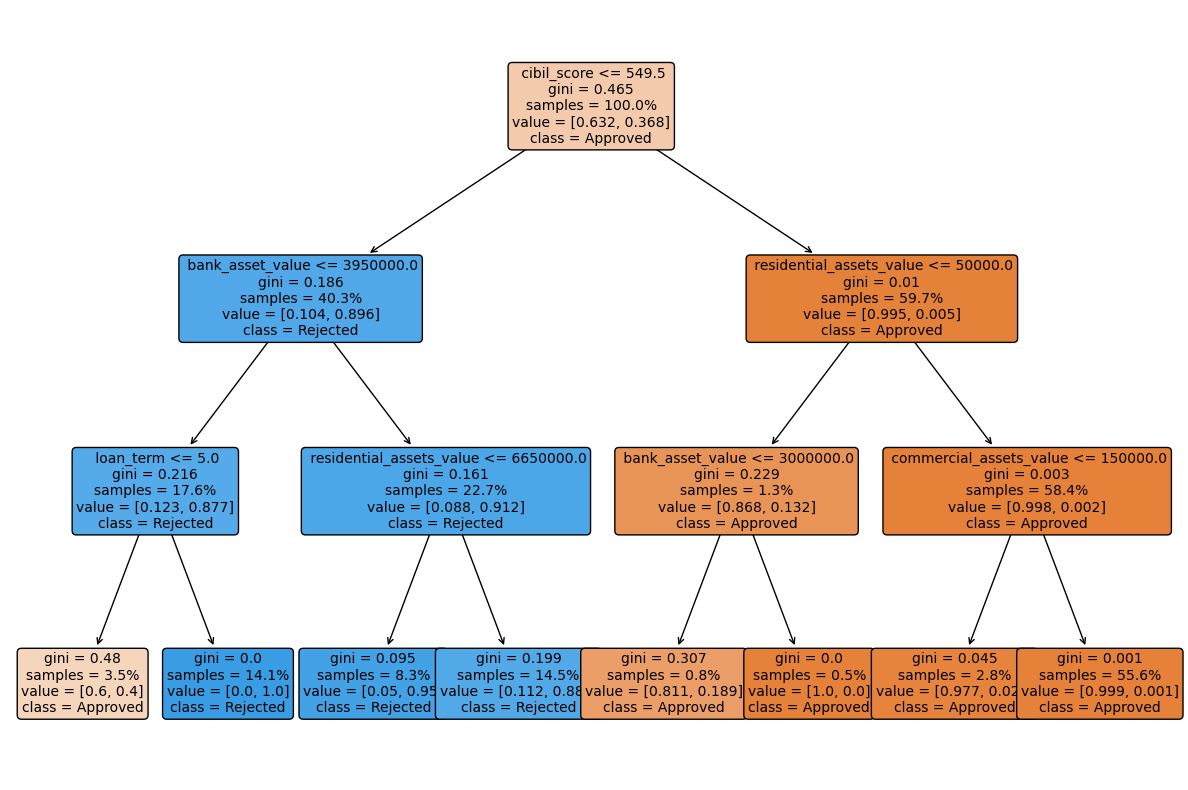

In [46]:
tree = best_rf_tree[1]  # Modify this index as needed

plt.figure(figsize=(15, 10))  # Adjust size based on your needs
plot_tree(tree, 
          feature_names=X_train.columns, 
          class_names=["Approved", "Rejected"],  # Adjust based on your class names
          filled=True, 
          rounded=True, 
          proportion=True,
          fontsize=10)  # Adjust font size as needed
plt.show()

In [163]:
#saving the model 
import joblib
#saving the file in pkl extension
joblib.dump(tree,"model.pkl")

['model.pkl']

In [175]:
#plotting te featrre importances
important = tree.feature_importances_
importances = np.argsort(important)[::-1]
importances

array([ 7,  6, 10,  8,  0,  9, 11,  5,  4,  3,  2,  1], dtype=int64)

In [176]:
importances_df = pd.DataFrame({
    "feature":X_train.columns,
"importances":importances})

In [177]:
importances_df.columns

Index(['feature', 'importances'], dtype='object')

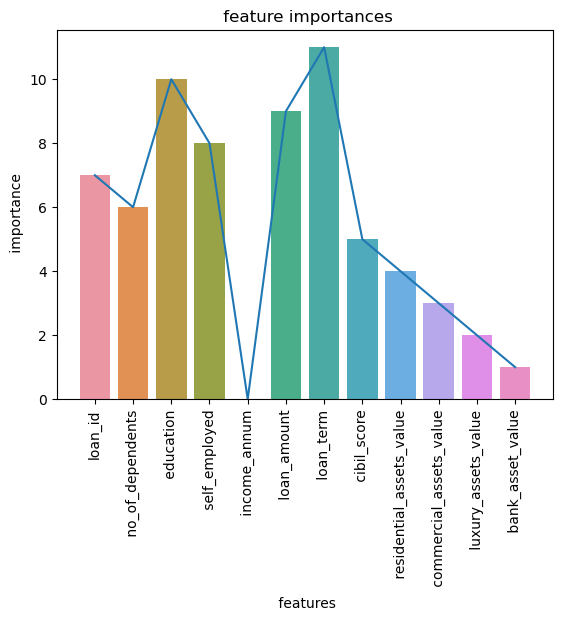

In [192]:
sns.barplot(data = importances_df,x="feature",y="importances")
sns.lineplot(data = importances_df,x="feature",y="importances")
plt.xticks(rotation=90)
plt.xlabel(" features")
plt.ylabel(" importance")
plt.title(" feature importances")
plt.show()

In [99]:
from sklearn.metrics import classification_report

In [116]:
rf_classification_report = classification_report(y_test,y_predict_rf)
dt_classification_report = classification_report(y_test,y_predict_dt)
logistic_classification_report = classification_report(y_test,y_predict_logistic)

def get_report(rf_classification_report,dt_classification_report,logistic_classification_report):
    print(f" classification report for random forest {rf_classification_report} ")
    print(f" classification report for decision tree {dt_classification_report}")
    print(f" classification report for logistic regression {logistic_classification_report}")

get_report(rf_classification_report,dt_classification_report,logistic_classification_report)

 classification report for random forest               precision    recall  f1-score   support

    Approved       0.93      1.00      0.96       523
    Rejected       1.00      0.88      0.94       331

    accuracy                           0.95       854
   macro avg       0.97      0.94      0.95       854
weighted avg       0.96      0.95      0.95       854
 
 classification report for decision tree               precision    recall  f1-score   support

    Approved       0.99      0.95      0.97       523
    Rejected       0.92      0.99      0.95       331

    accuracy                           0.96       854
   macro avg       0.96      0.97      0.96       854
weighted avg       0.97      0.96      0.96       854

 classification report for logistic regression               precision    recall  f1-score   support

    Approved       0.74      0.92      0.82       523
    Rejected       0.80      0.50      0.62       331

    accuracy                           0.76       85

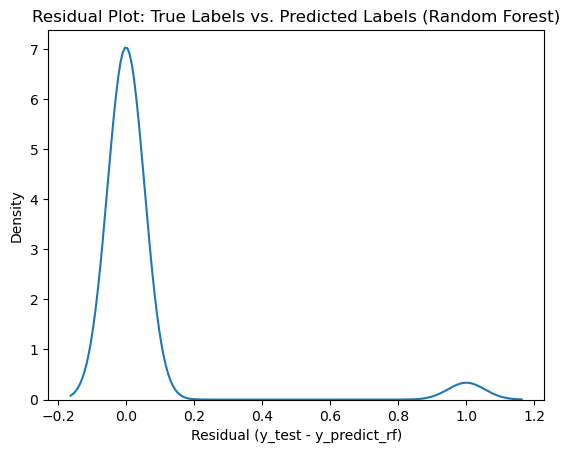

In [123]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_predict_rf_encoded = le.transform(y_predict_rf)

y_delta = y_test_encoded - y_predict_rf_encoded
sns.kdeplot(y_delta)
plt.title("Residual Plot: True Labels vs. Predicted Labels (Random Forest)")
plt.xlabel("Residual (y_test - y_predict_rf)")
plt.ylabel("Density")
plt.show()